In [1]:
import arviz as az
import bambi as bmb
import pandas as pd

In [2]:
az.style.use("arviz-darkgrid")

In [3]:
data = pd.read_csv("gasoline.csv")
data["batch"] = pd.Categorical(data["batch"], [10, 1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=True)

In [4]:
priors = {
    "Intercept": bmb.Prior("Normal", mu=0, sigma=5),
    "batch": bmb.Prior("Normal", mu=0, sigma=3),
    "temp": bmb.Prior("Normal", mu=0, sigma=0.1),
}
model = bmb.Model("yield ~ temp + batch", data, family="beta", priors=priors)
model

Formula: yield ~ temp + batch
Family name: Beta
Link: logit
Observations: 32
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0, sigma: 5)
    temp ~ Normal(mu: 0, sigma: 0.1)
    batch ~ Normal(mu: 0, sigma: 3)

  Auxiliary parameters
    kappa ~ HalfCauchy(beta: 1)

In [5]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [yield_kappa, batch, temp, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [6]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-6.139,0.239,-6.608,-5.709,0.010,0.007,618.0,900.0,1.0
temp,0.011,0.001,0.010,0.012,0.000,0.000,1415.0,1142.0,1.0
batch[1],1.716,0.133,1.457,1.945,0.006,0.004,463.0,484.0,1.0
batch[2],1.310,0.158,1.005,1.600,0.008,0.005,430.0,768.0,1.0
batch[3],1.559,0.153,1.270,1.836,0.007,0.005,476.0,805.0,1.0
batch[4],1.054,0.136,0.804,1.323,0.006,0.005,454.0,532.0,1.0
batch[5],1.123,0.139,0.857,1.376,0.006,0.005,482.0,591.0,1.0
batch[6],1.027,0.147,0.743,1.296,0.006,0.005,540.0,577.0,1.0
batch[7],0.534,0.148,0.266,0.814,0.006,0.004,616.0,591.0,1.0
batch[8],0.489,0.145,0.224,0.760,0.006,0.005,547.0,582.0,1.0


In [7]:
model.predict(idata, kind="mean")

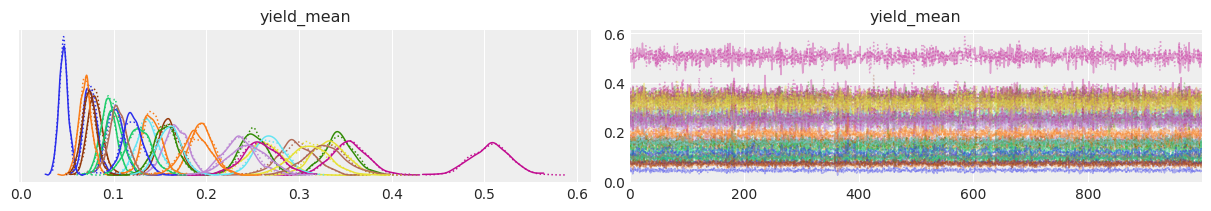

In [8]:
az.plot_trace(idata, var_names="yield_mean");

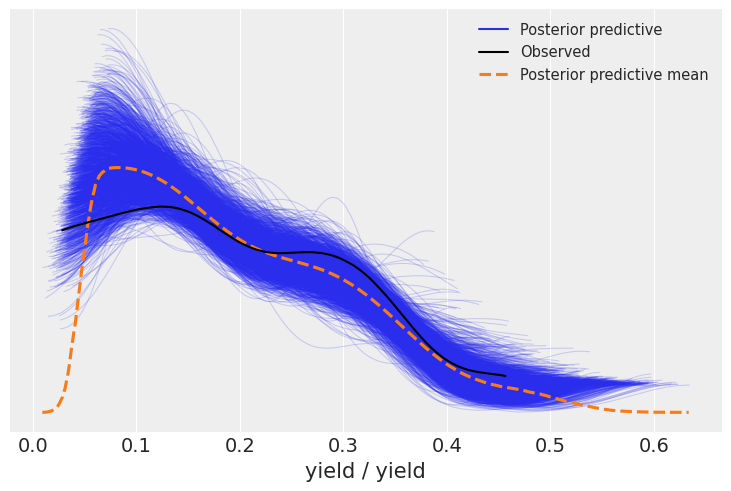

In [9]:
model.predict(idata, kind="pps")
az.plot_ppc(idata);